In [23]:
import numpy as np
from matplotlib import pyplot as plt

import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn import tree
from mlxtend.plotting import plot_decision_regions
# fig = plt.figure(figsize=(10,10))
# _ = tree.plot_tree(clf, 
#                    feature_names=iris.feature_names,  
#                    class_names=iris.target_names,
#                    filled=True)

In [24]:
iris=load_iris()
X=iris.data[:,:2]
Y=iris.target

setosa_train=X[:25,:]
versicolor_train=X[50:75,:]
virginica_train=X[100:125,:]

X_train=np.append(setosa_train,versicolor_train,axis=0)
X_train=np.append(X_train,virginica_train,axis=0)

setosa_test=X[25:50,:]
versicolor_test=X[75:100,:]
virginica_test=X[125:150,:]

X_test=np.append(setosa_test,versicolor_test,axis=0)
X_test=np.append(X_test,virginica_test,axis=0)

Y_train=Y[:25]
Y_train=np.append(Y_train,Y[50:75])
Y_train=np.append(Y_train,Y[100:125])

Y_test=Y_train

In [25]:
clf = DecisionTreeClassifier(random_state=0)
clf = clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.72


In [26]:
print(classification_report(Y_test, Y_pred,target_names=iris.target_names))

              precision    recall  f1-score   support

      setosa       0.96      0.92      0.94        25
  versicolor       0.55      0.84      0.67        25
   virginica       0.77      0.40      0.53        25

    accuracy                           0.72        75
   macro avg       0.76      0.72      0.71        75
weighted avg       0.76      0.72      0.71        75



C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


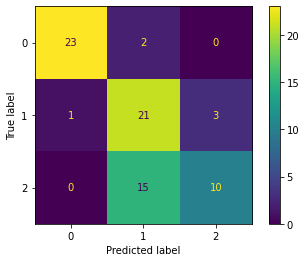

In [27]:
plot_confusion_matrix(clf, X_test, Y_test)

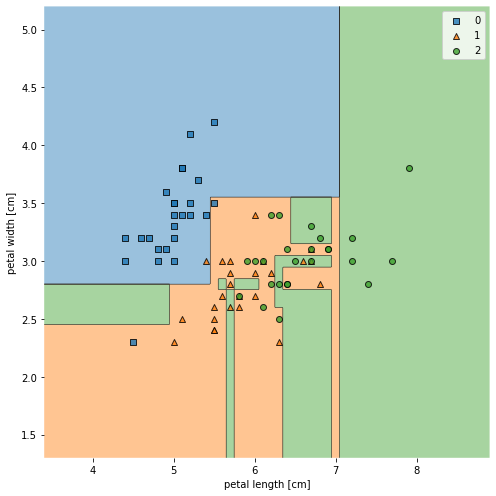

In [28]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_decision_regions(X_test,Y_test, clf)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [29]:
a=clf.get_depth()
max=0
best_depth=0
for i in range(1,a+1):
    clf = DecisionTreeClassifier(random_state=0,max_depth=i)
    clf = clf.fit(X_train,Y_train)
    Y_pred = clf.predict(X_test)
    accuracy=metrics.accuracy_score(Y_test, Y_pred)
    print("Accuracy with depth",i, ":",accuracy)
    if (accuracy>max):
        max=accuracy
        best_depth=i
    

Accuracy with depth 1 : 0.64
Accuracy with depth 2 : 0.68
Accuracy with depth 3 : 0.6933333333333334
Accuracy with depth 4 : 0.8
Accuracy with depth 5 : 0.8
Accuracy with depth 6 : 0.8
Accuracy with depth 7 : 0.68
Accuracy with depth 8 : 0.7066666666666667
Accuracy with depth 9 : 0.68
Accuracy with depth 10 : 0.72
Accuracy with depth 11 : 0.72


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


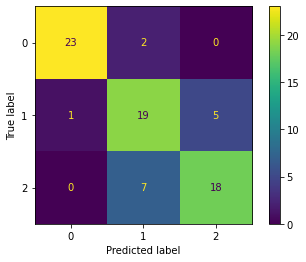

In [30]:
clf = DecisionTreeClassifier(random_state=0,max_depth=best_depth)
clf = clf.fit(X_train,Y_train)
plot_confusion_matrix(clf, X_test, Y_test)

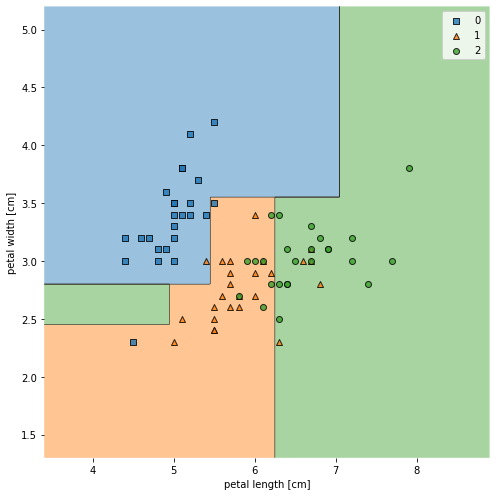

In [31]:
fig, ax = plt.subplots(figsize=(7, 7))
plot_decision_regions(X_test,Y_test, clf)
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='best')
plt.tight_layout()
plt.show()